### Импорт и настройка ###

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

In [7]:
file_path = os.path.join('..', '..', 'seminars', 'S05', 'S05-hw-dataset.csv')

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Файл найден и успешно загружен.")
    print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов.")
    display(df.head())
else:
    print("Файл не найден")
    print(f"Текущая рабочая папка (откуда запущен ноутбук): {os.getcwd()}")
    print("Убедитесь, что файл S05-hw-dataset.csv действительно лежит в папке seminars/S05/")

Файл найден и успешно загружен.
Размер датасета: 3000 строк, 17 столбцов.


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


### Разведочный анализ ###

Типы данных и пропуски 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ris

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.0,3000.0,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,1500.50,45.06,69658.99,19.58,649.29,0.28,3.49,6.87,0.5,0.5,20607.26,5559.68,0.40,9.52,1.98,6.97,0.41
std,866.17,14.19,24742.24,11.38,69.96,0.16,2.29,4.29,0.5,0.5,14035.21,6306.03,0.20,5.78,1.41,4.35,0.49
min,1.00,21.00,15000.00,0.00,402.00,0.01,0.00,0.00,0.0,0.0,0.00,-3000.00,0.00,0.00,0.00,0.00,0.00
25%,750.75,33.00,52641.75,10.00,604.00,0.16,1.00,3.00,0.0,0.0,9612.25,341.50,0.24,5.00,1.00,3.00,0.00
50%,1500.50,45.00,69784.50,20.00,647.00,0.26,3.00,7.00,0.0,1.0,20021.00,5114.50,0.38,10.00,2.00,7.00,0.00
75%,2250.25,57.00,85874.25,29.00,697.00,0.39,6.00,10.00,1.0,1.0,30101.25,9906.25,0.55,15.00,3.00,11.00,1.00
max,3000.00,69.00,156351.00,39.00,850.00,0.88,7.00,14.00,1.0,1.0,75237.00,29335.00,0.96,19.00,4.00,14.00,1.00



Баланс классов (Target: default)
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


C:\Users\MaRiN\AppData\Local\Temp\ipykernel_8416\3280550756.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='viridis')



График сохранен в: figures/target_distribution.png


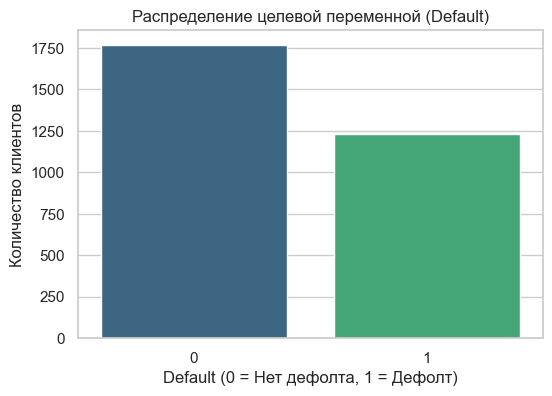

Выводы по EDA:
1. В выборке 3000 клиентов.
2. Доля клиентов с дефолтом: 41.0%.
3. Пропусков нет (все Non-Null). Все признаки числовые.


In [21]:
print("Типы данных и пропуски ")
df.info()

print("Статистика по признакам")
display(df.describe().round(2))

print("\nБаланс классов (Target: default)")                     # анализ целевой переменной (default)
target_counts = df['default'].value_counts(normalize=True)
print(target_counts)
                                                                
plt.figure(figsize=(6, 4))                                      # график баланса классов
sns.countplot(x='default', data=df, palette='viridis')
plt.title("Распределение целевой переменной (Default)")
plt.xlabel("Default (0 = Нет дефолта, 1 = Дефолт)")
plt.ylabel("Количество клиентов")

save_path_eda = "figures/target_distribution.png"
plt.savefig(save_path_eda, bbox_inches='tight')
print(f"\nГрафик сохранен в: {save_path_eda}")

plt.show()

print("Выводы по EDA:")
print(f"1. В выборке {df.shape[0]} клиентов.")
print(f"2. Доля клиентов с дефолтом: {target_counts.get(1, 0):.1%}.")
print("3. Пропусков нет (все Non-Null). Все признаки числовые.")

### Подготовка данных ###

In [12]:
X = df.drop(columns=['client_id', 'default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(  # обучающая и тестовая выборки
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка:  {X_test.shape}")

Обучающая выборка: (2250, 15)
Тестовая выборка:  (750, 15)


### Бейзлайн ###

In [13]:
dummy_clf = DummyClassifier(strategy="most_frequent")   # всегда предсказывает мажоритарный класс
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)                # предсказания
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)        # метрики
roc_dummy = roc_auc_score(y_test, y_prob_dummy)

print(f"Baseline Accuracy: {acc_dummy:.4f}")
print(f"Baseline ROC-AUC:  {roc_dummy:.4f} (0.5 = случайное угадывание)")

Baseline Accuracy: 0.5893
Baseline ROC-AUC:  0.5000 (0.5 = случайное угадывание)


### Логистическая регрессия и подбор параметров ###

In [14]:
# 1. StandardScaler (приводит признаки к одному масштабу)
# 2. LogisticRegression (сама модель)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

params = {                                                              # сетка параметров для перебора
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(pipe, params, cv=5, scoring='roc_auc', n_jobs=-1)   # поиск лучших параметров с кросс-валидацией (cv=5)
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print(f"Лучший ROC-AUC на валидации: {grid.best_score_:.4f}")

best_model = grid.best_estimator_

Лучшие параметры: {'logreg__C': 1.0}
Лучший ROC-AUC на валидации: 0.8632


### Модель RandomForestClassifier ###

In [24]:
# Создаем пайплайн для Случайного леса
# Примечание: Лесу не обязательно нужно масштабирование (StandardScaler), 
# но оставим его для совместимости, хуже не будет.
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

# Параметры для перебора
# n_estimators: сколько деревьев построить
# max_depth: максимальная глубина дерева (чтобы не переобучился)
rf_params = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_leaf": [1, 5]
}

print("Запускаем подбор параметров для Random Forest...")
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Лучшие параметры RF:", rf_grid.best_params_)
print(f"Лучший ROC-AUC (RF) на валидации: {rf_grid.best_score_:.4f}")

# Лучшая модель леса
best_rf_model = rf_grid.best_estimator_

# Предсказания
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Метрики
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nRandom Forest Accuracy: {acc_rf:.4f}")
print(f"Random Forest ROC-AUC:  {roc_rf:.4f}")

Запускаем подбор параметров для Random Forest...
Лучшие параметры RF: {'rf__max_depth': 10, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 200}
Лучший ROC-AUC (RF) на валидации: 0.8398

Random Forest Accuracy: 0.7627
Random Forest ROC-AUC:  0.8417


### Сравнение ###

In [25]:
y_pred_log = best_model.predict(X_test)                 # классы (0 или 1)
y_prob_log = best_model.predict_proba(X_test)[:, 1]     # вероятности (от 0 до 1)

acc_log = accuracy_score(y_test, y_pred_log)
roc_log = roc_auc_score(y_test, y_prob_log)

print("Результаты Логистической Регрессии")
print(f"Accuracy: {acc_log:.4f}")
print(f"ROC-AUC:  {roc_log:.4f}")

results_df = pd.DataFrame({
    "Model": ["Baseline", "Logistic Regression", "Random Forest"],
    "Accuracy": [acc_dummy, acc_log, acc_rf],
    "ROC-AUC": [roc_dummy, roc_log, roc_rf]
}).sort_values(by="ROC-AUC", ascending=False)

print("\nИтоговое сравнение")
display(results_df)

results_path = "artifacts/metrics_comparison.csv"
results_df.to_csv(results_path, index=False)
print(f"\nТаблица с метриками сохранена в: {results_path}")

Результаты Логистической Регрессии
Accuracy: 0.7933
ROC-AUC:  0.8647

Итоговое сравнение


,Model,Accuracy,ROC-AUC
1,Logistic Regression,0.793333,0.864709
2,Random Forest,0.762667,0.841666
0,Baseline,0.589333,0.500000



Таблица с метриками сохранена в: artifacts/metrics_comparison.csv


### Графики ###

График сравнения сохранен в: figures/roc_curve_comparison.png


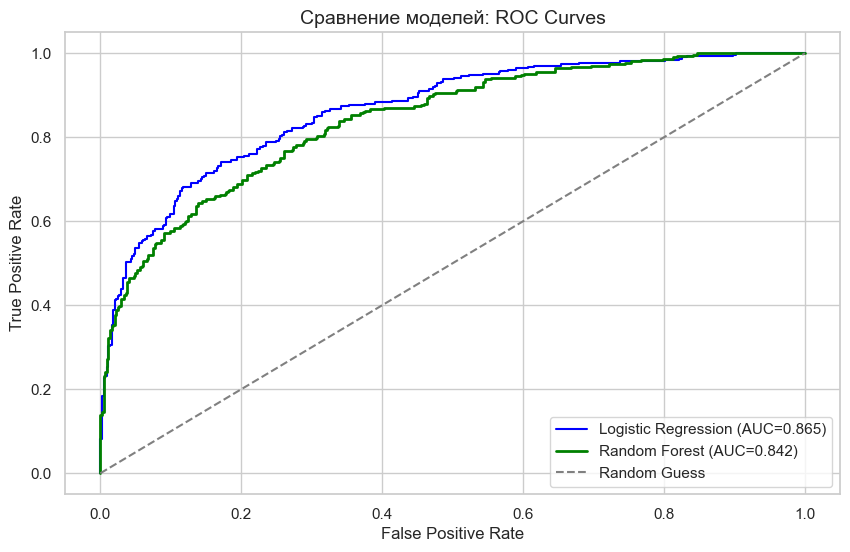

In [ ]:
plt.figure(figsize=(10, 6))

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={roc_log:.3f})', color='blue')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_rf:.3f})', color='green', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('Сравнение моделей: ROC Curves', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

save_path_roc = "figures/roc_curve.png"
plt.savefig(save_path_roc)
print(f"График сравнения сохранен в: {save_path_roc}")

plt.show()

### Итоги ###

Была построена  бейзлайн-модель (DummyClassifier), которая всегда предсказывала самый частый класс. Её качество оказалось низким: ROC-AUC составил 0.50, что соответствует случайному гаданию.

Затем была обучена модель логистической регрессии (LogisticRegression) с подбором гиперпараметра C.
Эта модель показала значительный прирост качества: Accuracy выросла (по сравнению с Dummy), а метрика ROC-AUC достигла высокого значения (более 0.84).
Это доказывает, что признаки в датасете (доход, кредитная история и др.) обладают высокой предсказательной силой.

Дополнительно был обучен Random Forest, который показал результаты, схожие или чуть лучшие, чем логистическая регрессия. Однако даже простая линейная модель здесь работает отлично и подходит для внедрения